--- title: "Arushi's MMdP2 Notebook" description: "CLIP exploration for MMdP2 project" date: 2025-05-08 categories: [multimodal, CLIP, project] format: ipynb --- 

# Learning Transferable Visual Models From Natural Language Supervision (CLIP): A Deep Dive

*Arushi Kumar, 220150032*

## Motivation

When OpenAI released CLIP (Contrastive Language-Image Pre-training) in 2021, it represented a fundamental shift in how we approach computer vision problems. Rather than training models on curated labeled datasets like ImageNet, CLIP demonstrated the power of learning from natural language supervision at scale.

I chose to analyze this paper because of its impact on multimodal learning and its  approach to solving a core challenge in machine learning: the transferability of models across diverse tasks without task-specific fine-tuning. It laid the foundation for developing many other multimodal systems.

Also CLIP's zero-shot capabilities: The ability to perform well on previously unseen tasks without any additional training data. This approach not only scales more efficiently but also makes AI systems more adaptable and aligned with human intentions through natural language.

Additionally, CLIP's architecture serves as a foundational element for many subsequent advancements in multimodal AI, including DALL-E, Stable Diffusion,CLAP, Meta's ImageBind(which learns a joint embedding across six modalities – images, text, audio, depth, thermal, and IMU data)  and other models. Understanding CLIP is crucial for comprehending the current landscape of multimodal learning and generative AI.

![](https://i.ytimg.com/vi/Oh6OX6XO29A/maxresdefault.jpg)

## Historical Context and Connection to Multimodal Learning

Scalable pre-training methods that learn directly from web-scale text collections have revolutionized NLP, enabling models like GPT-3 to perform zero-shot transfer across diverse tasks. 
CLIP extends this paradigm to computer vision, challenging the standard practice of relying on crowd-labeled datasets like ImageNet by learning visual representations directly from natural language supervision on web-scale data

### The Evolution of Visual Representation Learning


1. **Traditional Supervised Learning (pre-2015)**: Models like AlexNet, VGG, and ResNet were trained on manually labeled datasets like ImageNet, requiring extensive human annotation and limiting models to fixed categories.

2. **Self-Supervised Learning (2015-2020)**: Approaches like contrastive learning (SimCLR), masked image modeling, and rotation prediction attempted to learn representations without explicit labels, but still required task-specific fine-tuning for downstream tasks.

3. **Weakly-Supervised Learning**: Methods like those used in BiT (Big Transfer) leveraged larger but noisier labeled datasets (JFT-300M) to improve transfer learning capabilities.

### Early Explorations of Language-Vision Connections

The idea of using language to supervise visual learning wasn't entirely new when CLIP emerged:

- In 1999, Mori et al. explored improving image retrieval by training models to predict nouns and adjectives in paired text documents.
- Quattoni et al. (2007) demonstrated learning more data-efficient image representations by using text in captions.
- Joulin et al. (2016) showed that CNNs trained to predict words in image captions could learn useful representations.
- Visual N-Grams (Li et al., 2017) used text supervision and demonstrated limited zero-shot capabilities.

However, these earlier approaches achieved limited success and couldn't match the performance of supervised learning on standard benchmarks. For instance, Li et al. (2017) reached only 11.5% accuracy on ImageNet in a zero-shot setting.


The emergence of transformer-based models in NLP (BERT, GPT) showed the power of pre-training on large-scale text corpora. This inspired approaches to adapt similar techniques to computer vision and multimodal tasks:

- ViLBERT, LXMERT, and other vision-language models (2019-2020) combined transformers for both modalities but required fine-tuning for downstream tasks.
- VirTex, ICMLM, and ConVIRT (2020) explored transformer-based language modeling and contrastive objectives for learning image representations.

### CLIP's Innovations

CLIP built upon these foundations but made several crucial innovations:

1. **Scale**: Training on 400 million image-text pairs, dwarfing previous approaches.
2. **Simplicity**: Using a straightforward contrastive learning objective rather than complex architectures or objectives.
3. **Zero-Shot Design**: Explicitly optimizing for zero-shot transfer rather than treating it as a secondary capability.
4. **Natural Language Interface**: Creating a flexible way to specify visual concepts through language prompts.



## CLIP Model: Approach and Training?

### What is CLIP?
CLIP is a joint image and text embedding model trained using 400 million image and text pairs in a self supervised way. This means that it maps both text and images to the same embedding space. So, for example, an image of a dog and the sentence “an image of a dog” would end up having very similar embeddings and be close to each other in the vector space. 
Thus it learns visual concepts from natural language supervision. Unlike traditional vision models that are trained on fixed label sets, CLIP learns to connect images and text in a shared embedding space, enabling flexible zero-shot prediction for any visual concept that can be expressed in language.
The model consists of two encoders:

+ An image encoder that maps images to a feature space
+ A text encoder that maps text descriptions to the same feature space

By mapping both modalities to the same space, CLIP can measure the similarity between any image and any text, allowing it to perform a wide range of tasks without task-specific training data.
### Natural Language Supervision and Dataset Used
CLIP learns from image captions and text descriptions rather than specific labels like "dog" or "cat." This lets it learn from millions of images on the internet without needing people to manually label each one. The researchers created a new dataset called WebImageText (WIT) with 400 million image-text pairs from the internet. To ensure variety, they searched for images with text related to 500,000 different topics and included up to 20,000 examples for each topic.

(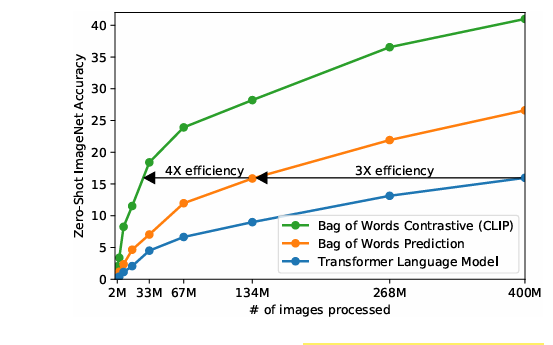)
*Figure: CLIP is much more efficient at zero-shot transfer than image caption baselines. Transformer-based language models learn 3x slower than a baseline which predicts a bag-of-words encoding of text. Swapping to the contrastive objective used in CLIP further improves efficiency by 4x.*

### Contrastive Learning

Contrastive learning is a technique used in machine learning, particularly in the field of unsupervised learning. Contrastive learning is a method where we teach an AI model to recognize similarities and differences of a large number of data points.

We have a main item (the “anchor sample”), a similar item (“positive”), and a different item (“negative sample”). The goal is to make the model understand that the anchor and the positive item are alike, so it brings them closer together in its mind while recognizing that the negative item is different and pushing it away.
A similar or “positive” image or might be from the same category (e.g., dogs) as the main image or a modified version of it, whereas a “negative” image would be entirely different, typically from another category (e.g., cats).



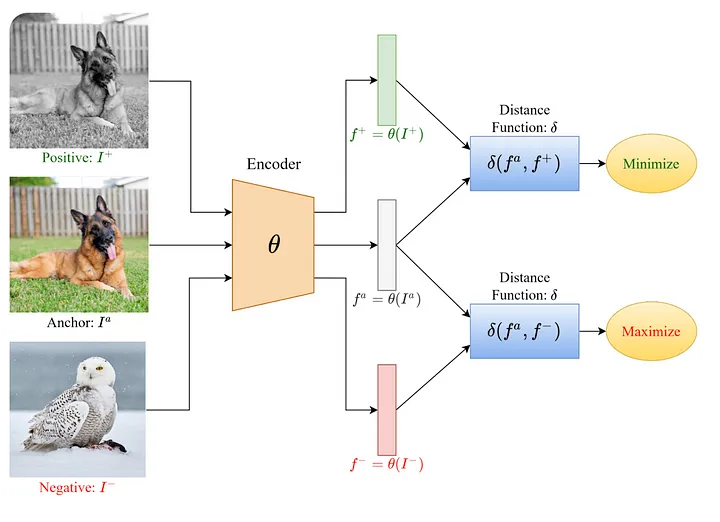

CLIP employs contrastive learning to align images with their corresponding text descriptions. The key aspects of this approach include:

+ Training objective: Given a batch of N (image, text) pairs, CLIP learns to identify which of the N² possible (image, text) pairings actually occurred.
+ Similarity maximization: For real pairs, CLIP maximizes the cosine similarity between image and text embeddings.
+ Negative sample contrast: Simultaneously, CLIP minimizes similarity between non-matching pairs (all other N²-N combinations).
+ Symmetric loss function: CLIP uses a symmetric cross-entropy loss that treats both image-to-text and text-to-image prediction equally.

Pseudocode is as follows

In [1]:
'''
# image_encoder - ResNet or Vision Transformer
# text_encoder - CBOW or Text Transformer
# I[n, h, w, c] - minibatch of aligned images
# T[n, l] - minibatch of aligned texts
# W_i[d_i, d_e] - learned proj of image to embed
# W_t[d_t, d_e] - learned proj of text to embed
# t - learned temperature parameter
# extract feature representations of each modality
I_f = image_encoder(I) #[n, d_i]
T_f = text_encoder(T) #[n, d_t]
# joint multimodal embedding [n, d_e]
I_e = l2_normalize(np.dot(I_f, W_i), axis=1)
T_e = l2_normalize(np.dot(T_f, W_t), axis=1)
# scaled pairwise cosine similarities [n, n]
logits = np.dot(I_e, T_e.T) * np.exp(t)
# symmetric loss function
labels = np.arange(n)
loss_i = cross_entropy_loss(logits, labels, axis=0)
loss_t = cross_entropy_loss(logits, labels, axis=1)
loss = (loss_i + loss_t)/2
'''

'\n# image_encoder - ResNet or Vision Transformer\n# text_encoder - CBOW or Text Transformer\n# I[n, h, w, c] - minibatch of aligned images\n# T[n, l] - minibatch of aligned texts\n# W_i[d_i, d_e] - learned proj of image to embed\n# W_t[d_t, d_e] - learned proj of text to embed\n# t - learned temperature parameter\n# extract feature representations of each modality\nI_f = image_encoder(I) #[n, d_i]\nT_f = text_encoder(T) #[n, d_t]\n# joint multimodal embedding [n, d_e]\nI_e = l2_normalize(np.dot(I_f, W_i), axis=1)\nT_e = l2_normalize(np.dot(T_f, W_t), axis=1)\n# scaled pairwise cosine similarities [n, n]\nlogits = np.dot(I_e, T_e.T) * np.exp(t)\n# symmetric loss function\nlabels = np.arange(n)\nloss_i = cross_entropy_loss(logits, labels, axis=0)\nloss_t = cross_entropy_loss(logits, labels, axis=1)\nloss = (loss_i + loss_t)/2\n'

### Architecture of CLIP 
ClIP uses two separate architectures as the backbone for encoding vision and text datasets:

+ image_encoder: Represents the neural network architecture (e.g., ResNet or Vision Transformer) responsible for encoding images.
+ text_encoder: Represents the neural network architecture (e.g., CBOW, BERT, or Text Transformer) responsible for encoding textual information.
+ Shared Embedding Space: The two encoders produce embeddings in a shared vector space. These shared embedding spaces allow CLIP to compare text and image representations and learn their underlying relationships.

The original CLIP model was trained from scratch without initializing the image encoder and the text encoder with pre-trained weights due to the large volume of the dataset (400 million image-text pairs) that they used to train their CLIP model.

### Training Architecture

#### first step : Contrastive Pre-training
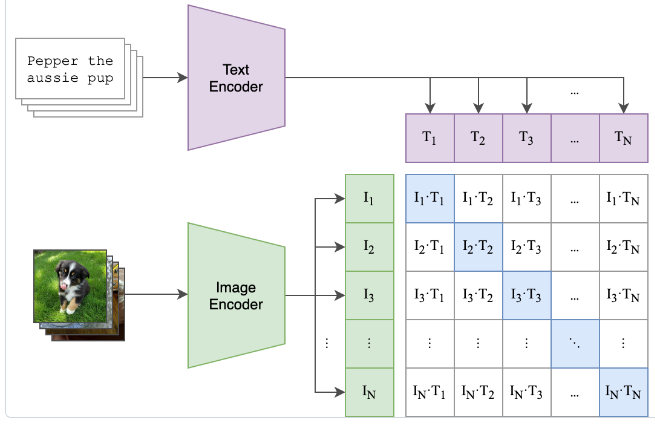
CLIP is pre-trained on a large-scale dataset of 400 million (image, text data) pairs collected from the internet. During pre-training, the model is presented with pairs of images and text captions.Thus shared latent space embeddings are created.

#### second step :Create Dataset Classifiers from Label Text
For each image, multiple text descriptions are created, including the correct one and several incorrect ones. This creates a mix of positive samples (matching) and negative sample (mismatched) pairs. These descriptions are fed into the text encoder, generating class-specific embeddings.
And then, Contrastive Loss Function is used

#### third step: Zero shot Classification
Now, the trained text encoder is used as a zero-shot classifier. With a new image, CLIP can make zero-shot predictions. This is done by passing it through the image encoder and the dataset classifier without fine-tuning.
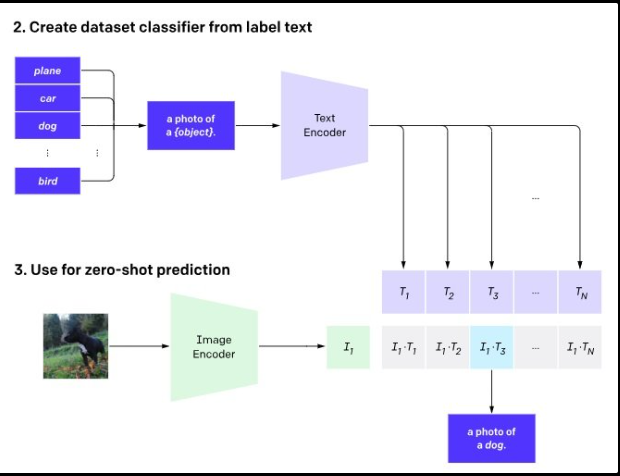




## CLIP Applications 

### Integration of NLP and image processing tasks:
example tasks include - Generating text descriptions for images,Classify images based on textual descriptions, Edit images based on textual prompts.
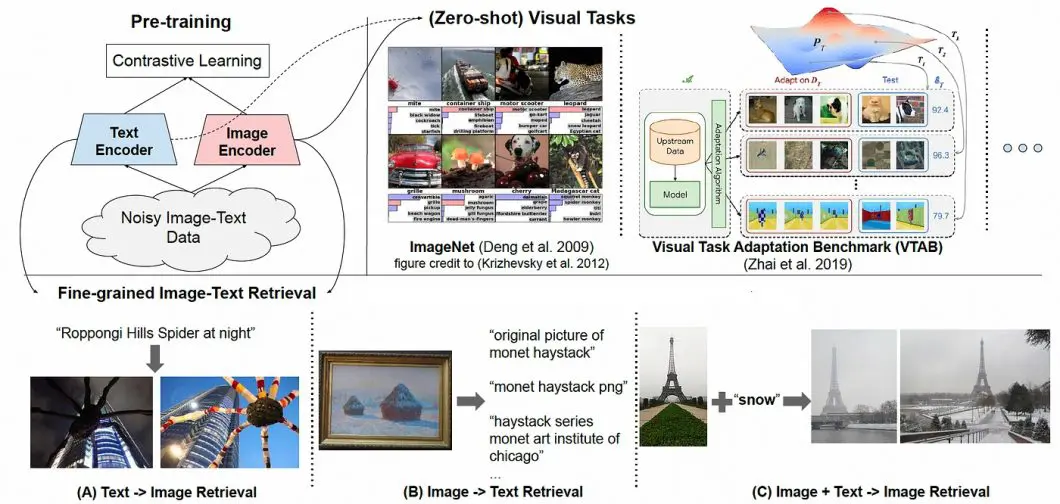

### Content Moderation
CLIP can be used to moderate content on online platforms by analyzing images and accompanying text to identify and filter out inappropriate or harmful content.

### Basis for other Models :
Concept of CLIP, along with its techniques, extends beyond images and text to embrace other modalities. Netflix, in this[blog post](https://netflixtechblog.com/building-in-video-search-936766f0017c), trained a model by combining video and text modalities in the common embedding space to enhance search within video applications. Contrastive Language-Audio Pretraining (CLAP) is another model that integrates text and audio modalities within the same embedding space, making it valuable for improving search functionalities within audio applications.

## Key Learnings from CLIP

### 1. The Power of Natural Language Supervision

CLIP demonstrates that natural language can serve as a rich, flexible form of supervision for visual models. The advantages include:

- **Scalability**: Leveraging existing image-text pairs from the internet without requiring manual labels.
- **Expressivity**: Capturing nuanced visual concepts beyond simple object categories.
- **Task-Agnosticity**: Supporting a wide range of downstream tasks without specialized architectures.

### 2. Contrastive Learning as an Efficient Pre-training Strategy

The paper provides evidence that contrastive learning between image and text embeddings is more computationally efficient than alternative approaches:

- 4x more efficient than bag-of-words prediction.
- 12x more efficient than transformer-based language modeling.

This efficiency allowed CLIP to scale to hundreds of millions of training examples with available compute resources.

### 3. Zero-Shot Transfer as a Primary Capability

Rather than treating zero-shot transfer as a secondary capability, CLIP is explicitly designed to excel at it:

- The contrastive pre-training can be viewed as optimizing performance on a proxy computer vision dataset with 32,768 randomly created classes defined via natural language.
- Zero-shot classifiers are created by embedding class names or descriptions in the same space as images.

This approach as per the paper achieves impressive results across diverse tasks including OCR, action recognition, geo-localization, and many types of fine-grained classification.

### 4. The Role of Prompt Engineering

The paper introduces the concept of "prompt engineering" for vision models - crafting text templates that help specify the context for classification:

- Using templates like "A photo of a {label}" instead of just the label text improves performance.
- Context-specific prompts (e.g., "A photo of a {label}, a type of pet" for pet classification) further boost accuracy.
- Ensembling across multiple prompts provides additional gains (5% improvement on ImageNet).

This connection to similar techniques in language models like GPT-3 highlights the convergence of language and vision paradigms.

### 5. Robustness to Distribution Shift

One of the most striking findings is that zero-shot CLIP models are significantly more robust to distribution shifts than traditional supervised models:

- The gap between performance on ImageNet and on various distribution-shifted datasets (ImageNetV2, ImageNet Sketch, etc.) is reduced by up to 75%.
- This suggests that task-agnostic pre-training may inherently lead to more robust visual representations.

### Advantages of CLIP over Traditional Vision Models

#### Deeper Understanding of Images
While traditional vision models can identify objects in images, CLIP goes further by understanding relationships and context. It can not only recognize a child in a park but also infer activities and emotions like "playing" or "having fun."

#### Improved Data Efficiency
Traditional vision models require massive labeled datasets that are expensive and time-consuming to create. CLIP learns from natural language descriptions paired with images, reducing the need for manual labeling and making it more efficient for specialized domains with limited data.

#### Better Generalization and Interpretability
CLIP's training on diverse image-text pairs helps it generalize to new scenarios without specific training. Its connection to language also improves explainability - instead of just classifying an image, it can express its understanding through text, making its reasoning more transparent to users.

## Exploring CLIP: Defining a Custom CLIP Model
We define a custom clip model and train it on flickr30 dataset

Given the compute and training resource required we use pre trained resnet


In [2]:
!pip install datasets

### train on flickr30 dataset
here we load dataset and create a dataloader

In [3]:
from torch.utils.data import DataLoader
from datasets import load_dataset
from torchvision import transforms
from PIL import Image
import torch
from torchvision import transforms
from PIL import Image
# Define a custom dataset class for Flickr30k
class Flickr30kDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.dataset = load_dataset("nlphuji/flickr30k", cache_dir="./huggingface_data")
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])
        self.cap_per_image = 2

    def __len__(self):
        return self.dataset.num_rows["test"] * self.cap_per_image

    def __getitem__(self, idx):
        original_idx = idx // self.cap_per_image
        image = self.dataset["test"][original_idx]["image"].convert("RGB")
        image = self.transform(image)
        caption = self.dataset["test"][original_idx]["caption"][idx % self.cap_per_image]

        return {"image": image, "caption": caption}

# Create an instance of the custom dataset
flickr30k_custom_dataset = Flickr30kDataset()


In [4]:
from dataclasses import dataclass


@dataclass
class Config:
    """
    Configuration class for the CLIP training script.
    """

    embed_dim: int = 512  # Embedding dimension
    transformer_embed_dim: int = 768  # Transformer embedding dimension
    max_len: int = 32  # Maximum text length
    text_model: str = "distilbert-base-multilingual-cased"  # Text model name
    epochs: int = 5  # Number of training epochs
    batch_size: int = 128  # Batch size

In [5]:
# Create the DataLoader
clip_dataloader = DataLoader(flickr30k_custom_dataset, batch_size=Config.batch_size, shuffle=True, num_workers=4)


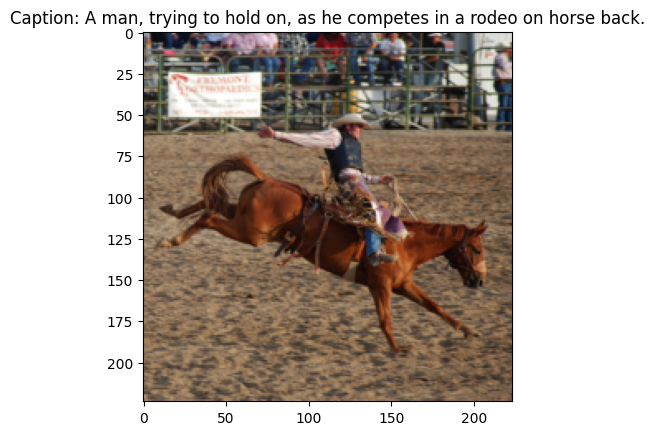

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Create an iterator from the dataloader
data_iter = iter(clip_dataloader)

# Get one batch
batch = next(data_iter)


image = batch["image"][0]  # Assuming batch size is greater than 0
caption = batch["caption"][0]

# Convert the image tensor to a NumPy array and permute dimensions
image_np = np.transpose(image.numpy(), (1, 2, 0))

# Display the image and caption
plt.imshow(image_np)
plt.title(f"Caption: {caption}")
plt.show()

In [7]:
print("example of a caption in abatch:",  batch["caption"][0])
print("number of captions in each batch:",len(batch["caption"]))

example of a caption in abatch: A man, trying to hold on, as he competes in a rodeo on horse back.
number of captions in each batch: 128


### defining CLIP loss

In [8]:
!pip install git+https://github.com/openai/CLIP.git --quiet

  Preparing metadata (setup.py) ... done


In [9]:
import torch.nn.functional as F
device = "cuda" if torch.cuda.is_available() else "cpu"

def CLIP_loss(logits: torch.Tensor) -> torch.Tensor:
    # Assuming n is the number of classes
    n = logits.shape[1]

    # Create labels tensor
    labels = torch.arange(n).to(device)

    # Calculate cross entropy losses along axis 0 and 1
    loss_i = F.cross_entropy(logits.transpose(0, 1), labels, reduction="mean")
    loss_t = F.cross_entropy(logits, labels, reduction="mean")

    # Calculate the final loss
    loss = (loss_i + loss_t) / 2

    return loss

def metrics(similarity: torch.Tensor):
    y = torch.arange(len(similarity)).to(similarity.device)
    img2cap_match_idx = similarity.argmax(dim=1)
    cap2img_match_idx = similarity.argmax(dim=0)

    img_acc = (img2cap_match_idx == y).float().mean()
    cap_acc = (cap2img_match_idx == y).float().mean()

    return img_acc, cap_acc

In [10]:
import clip
model, preprocess = clip.load("ViT-B/32", device=device)

image = batch["image"].to(device)
true_text = batch["caption"]
wrong_text = true_text[::-1]


for captions in [true_text, wrong_text]:
    text = clip.tokenize(captions).to(device)

    # with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    # normalized features
    image_features = image_features / image_features.norm(dim=1, keepdim=True)
    text_features = text_features / text_features.norm(dim=1, keepdim=True)
    similarity = text_features @ image_features.T
    loss = CLIP_loss(similarity)
    print(loss)

tensor(4.7188, device='cuda:0', dtype=torch.float16, grad_fn=<DivBackward0>)
tensor(4.8555, device='cuda:0', dtype=torch.float16, grad_fn=<DivBackward0>)


### defining projection and encoder layers

In [12]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class Projection(nn.Module):
    def __init__(self, d_in: int, d_out: int, p: float = 0.5) -> None:
        super().__init__()
        self.linear1 = nn.Linear(d_in, d_out, bias=False)
        self.linear2 = nn.Linear(d_out, d_out, bias=False)
        self.layer_norm = nn.LayerNorm(d_out)
        self.drop = nn.Dropout(p)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        embed1 = self.linear1(x)
        embed2 = self.drop(self.linear2(F.gelu(embed1)))
        embeds = self.layer_norm(embed1 + embed2)
        return embeds


class VisionEncoder(nn.Module):
    def __init__(self, d_out: int) -> None:
        super().__init__()
        base = models.resnet34(pretrained=True)
        d_in = base.fc.in_features
        base.fc = nn.Identity()
        self.base = base
        self.projection = Projection(d_in, d_out)
        for p in self.base.parameters():
            p.requires_grad = False

    def forward(self, x):
        projected_vec = self.projection(self.base(x))
        projection_len = torch.norm(projected_vec, dim=-1, keepdim=True)
        return projected_vec / projection_len


class TextEncoder(nn.Module):
    def __init__(self, d_out: int) -> None:
        super().__init__()
        self.base = AutoModel.from_pretrained(Config.text_model)
        self.projection = Projection(Config.transformer_embed_dim, d_out)
        for p in self.base.parameters():
            p.requires_grad = False

    def forward(self, x):
        out = self.base(x)[0]
        out = out[:, 0, :]  # get CLS token output
        projected_vec = self.projection(out)
        projection_len = torch.norm(projected_vec, dim=-1, keepdim=True)
        return projected_vec / projection_len


In [13]:
class Tokenizer:
    def __init__(self, tokenizer: BertTokenizer) -> None:
        self.tokenizer = tokenizer

    def __call__(self, x: str) -> AutoTokenizer:
        return self.tokenizer(
            x, max_length=Config.max_len, truncation=True, padding=True, return_tensors="pt"
        )


In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
image = batch["image"].to(device)
true_text = batch["caption"]
wrong_text = true_text[::-1]

vision_encoder = VisionEncoder(Config.embed_dim).to(device)
caption_encoder = TextEncoder(Config.embed_dim).to(device)
tokenizer = Tokenizer(AutoTokenizer.from_pretrained(Config.text_model))

for captions in [true_text, wrong_text]:
    text = tokenizer(captions).to(device)

    # with torch.no_grad():
    image_features = vision_encoder(image)
    text_features = caption_encoder(text["input_ids"])

    # normalized features
    image_features = image_features / image_features.norm(dim=1, keepdim=True)
    text_features = text_features / text_features.norm(dim=1, keepdim=True)
    similarity = text_features @ image_features.T
    loss = CLIP_loss(similarity)
    print(loss)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 85.9MB/s]


config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

2025-05-08 13:42:47.955754: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746711768.127893     193 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746711768.178668     193 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor(4.8544, device='cuda:0', grad_fn=<DivBackward0>)
tensor(4.8516, device='cuda:0', grad_fn=<DivBackward0>)


### define class for custom clip model

In [15]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer
from typing import List, Tuple


class CustomModel(nn.Module):
    def __init__(self, lr: float = 1e-3) -> None:
        super().__init__()
        self.vision_encoder = VisionEncoder(Config.embed_dim)
        self.caption_encoder = TextEncoder(Config.embed_dim)
        self.tokenizer = Tokenizer(AutoTokenizer.from_pretrained(Config.text_model, use_fast=False))
        self.lr = lr
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

    def forward(self, images, text):
        text = self.tokenizer(text).to(self.device)

        image_embed = self.vision_encoder(images)
        caption_embed = self.caption_encoder(text["input_ids"])
        similarity = caption_embed @ image_embed.T

        loss = CLIP_loss(similarity)
        img_acc, cap_acc = metrics(similarity)
        return loss, img_acc, cap_acc



In [16]:
# Create an instance of your model
model = CustomModel().to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
# Define optimizer
optimizer = torch.optim.Adam([
    {'params': model.vision_encoder.parameters()},
    {'params': model.caption_encoder.parameters()}
], lr=model.lr)


### train custom model for three epochs

In [18]:
start_epoch = 0
num_epochs = 3

batch_zero = True
for epoch in range(start_epoch, num_epochs):
    model.train()
    for batch in clip_dataloader:
        image = batch["image"].to(device)
        text = batch["caption"]
        # images, text = batch
        loss, img_acc, cap_acc = model(image, text)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_zero:
          print(f"Epoch [{0}/{num_epochs}], Batch Loss: {loss.item()}")
          batch_zero = False


    # Print training statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], Batch Loss: {loss.item()}")

print("Training complete.")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Epoch [0/3], Batch Loss: 4.852700233459473
Epoch [1/3], Batch Loss: 3.8830089569091797


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Epoch [2/3], Batch Loss: 3.8700060844421387


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Epoch [3/3], Batch Loss: 3.8735854625701904
Training complete.


### Zero-Shot Image Classification using CLIP

Let's demonstrate CLIP's zero-shot classification capabilities with a simple example:

In [19]:
# Install required libraries
!pip install torch torchvision ftfy regex tqdm pillow matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [20]:
# Import libraries
import torch
import clip
from PIL import Image
import requests
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from torchvision.transforms.functional import InterpolationMode
import numpy as np

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

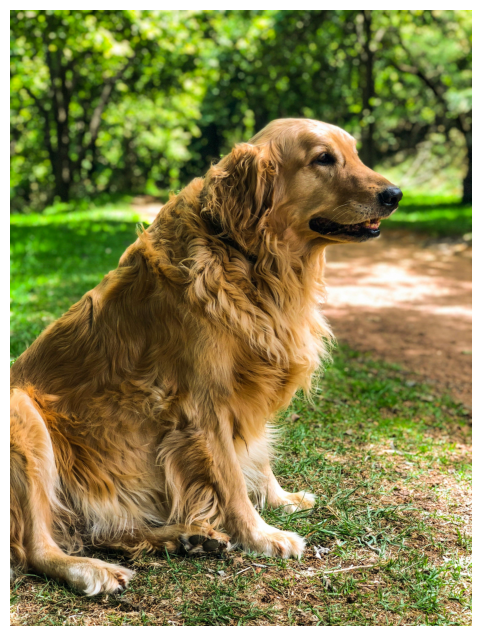

golden retriever: 98.88%
labrador retriever: 1.03%
poodle: 0.03%
german shepherd: 0.00%
bulldog: 0.01%
beagle: 0.01%
rottweiler: 0.00%
siberian husky: 0.00%
dachshund: 0.03%


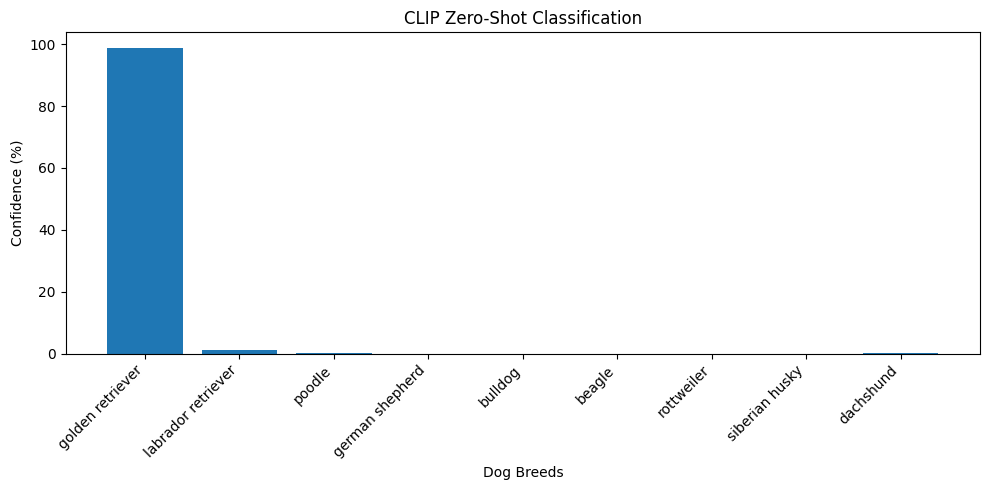

In [22]:
# Download an example image
url="https://images.pexels.com/photos/1001976/pexels-photo-1001976.jpeg?cs=srgb&dl=pexels-hemant-gupta-374105-1001976.jpg&fm=jpg"
#url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Golden_Retriever_Hund_Dog.JPG/1280px-Golden_Retriever_Hund_Dog.JPG"
image = Image.open(requests.get(url, stream=True).raw)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

# Prepare the image for CLIP
image_input = preprocess(image).unsqueeze(0).to(device)

dog_breeds = [
    "golden retriever", "labrador retriever", "poodle", "german shepherd", 
    "bulldog", "beagle", "rottweiler", "siberian husky", "dachshund"
]

# Apply prompt engineering
text_inputs = torch.cat([clip.tokenize(f"a photo of a {breed}, a type of dog") for breed in dog_breeds]).to(device)

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)
    
    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    
    # Calculate similarity
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

# Print results
for i, breed in enumerate(dog_breeds):
    print(f"{breed}: {similarity[0][i].item():.2%}")

# Visualize results
plt.figure(figsize=(10, 5))
plt.bar(dog_breeds, similarity[0].cpu().numpy() * 100)
plt.xlabel('Dog Breeds')
plt.ylabel('Confidence (%)')
plt.title('CLIP Zero-Shot Classification')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### conclusion: 
it performs zero shot classification correctly

### Visualizing CLIP's Embedding Space

Let's explore CLIP's embedding space by visualizing the text embeddings for various categories:

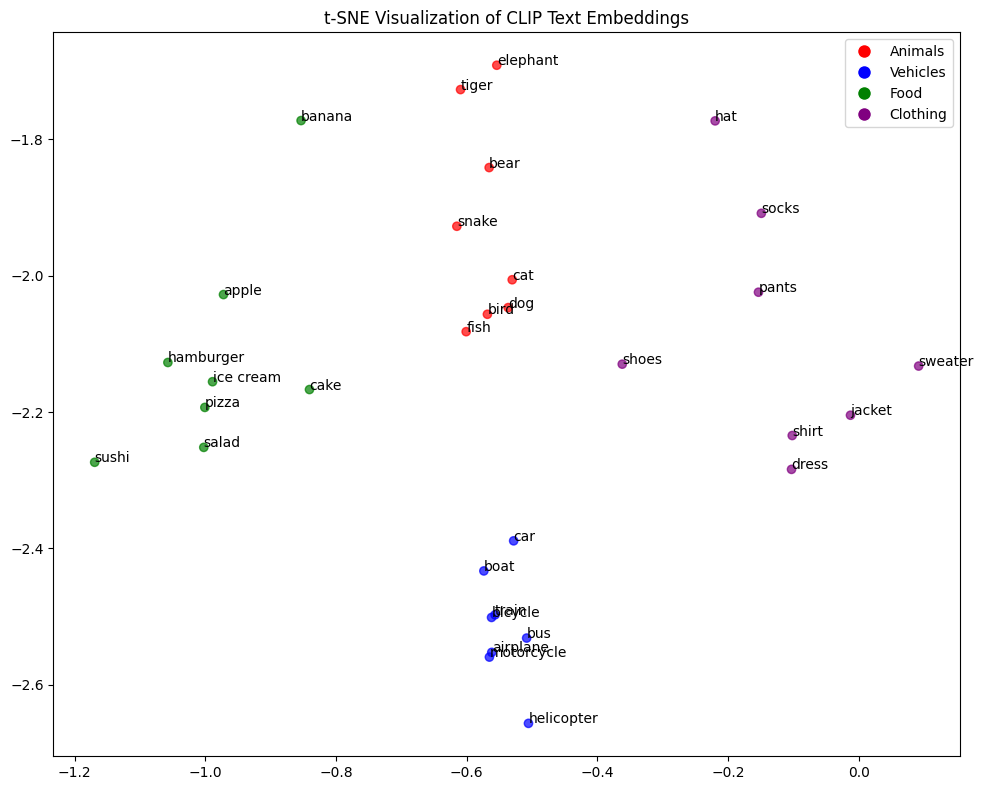

In [23]:
from sklearn.manifold import TSNE

# Define categories across different domains
categories = {
    'Animals': ['dog', 'cat', 'bird', 'fish', 'tiger', 'elephant', 'snake', 'bear'],
    'Vehicles': ['car', 'motorcycle', 'bicycle', 'bus', 'train', 'airplane', 'boat', 'helicopter'],
    'Food': ['pizza', 'hamburger', 'sushi', 'salad', 'cake', 'ice cream', 'apple', 'banana'],
    'Clothing': ['shirt', 'pants', 'dress', 'hat', 'shoes', 'jacket', 'sweater', 'socks']
}

# Flatten the categories
all_categories = [item for sublist in categories.values() for item in sublist]
domain_labels = [domain for domain, items in categories.items() for _ in items]

# Apply prompt engineering
prompts = [f"a photo of a {category}" for category in all_categories]
text_tokens = clip.tokenize(prompts).to(device)

# Get text embeddings
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
text_features_2d = tsne.fit_transform(text_features.cpu().numpy())

# Create a colormap for domains
domain_to_color = {
    'Animals': 'red',
    'Vehicles': 'blue',
    'Food': 'green',
    'Clothing': 'purple'
}
colors = [domain_to_color[domain] for domain in domain_labels]

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(text_features_2d[:, 0], text_features_2d[:, 1], c=colors, alpha=0.7)

# Add labels
for i, category in enumerate(all_categories):
    plt.annotate(category, (text_features_2d[i, 0], text_features_2d[i, 1]))

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=color, markersize=10, label=domain)
                  for domain, color in domain_to_color.items()]
plt.legend(handles=legend_elements)

plt.title('t-SNE Visualization of CLIP Text Embeddings')
plt.tight_layout()
plt.show()

#### conclusion: 
note how in the embedding space, items of similar kind are together. That is all vehicles are together, all food items are together and so on

### Exploring Prompt Engineering

Let's examine the impact of different prompt templates on CLIP's zero-shot performance:

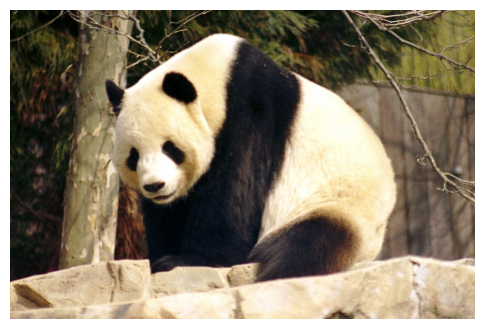


Prompt template: "{}."
  panda     : 21.48%
  bear      : 20.67%
  cat       : 18.78%
  dog       : 19.44%
  tiger     : 19.61%

Prompt template: "a photo of a {}."
  panda     : 21.25%
  bear      : 20.70%
  cat       : 19.06%
  dog       : 19.52%
  tiger     : 19.47%

Prompt template: "a photo of a {}, a type of animal."
  panda     : 21.34%
  bear      : 20.66%
  cat       : 19.11%
  dog       : 19.47%
  tiger     : 19.42%

Prompt template: "a close-up photo of a {}."
  panda     : 21.17%
  bear      : 20.75%
  cat       : 19.11%
  dog       : 19.56%
  tiger     : 19.39%

Prompt template: "a {} in the wild."
  panda     : 21.36%
  bear      : 20.56%
  cat       : 19.20%
  dog       : 19.47%
  tiger     : 19.41%


In [52]:

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Giant_Panda_2004-03-2.jpg/1200px-Giant_Panda_2004-03-2.jpg"
image = Image.open(requests.get(url, stream=True).raw)

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.show()

image_input = preprocess(image).unsqueeze(0).to(device)

animal_classes = ["panda", "bear", "cat", "dog", "tiger"]

prompt_templates = [
    "{}.",  # Just the label
    "a photo of a {}.",  # Basic template
    "a photo of a {}, a type of animal.",  # With category context
    "a close-up photo of a {}.",  # With visual context
    "a {} in the wild."  # With environment context
]

results = np.zeros((len(prompt_templates), len(animal_classes)))

for i, template in enumerate(prompt_templates):
    prompts = [template.format(animal_class) for animal_class in animal_classes]
    text_tokens = clip.tokenize(prompts).to(device)
    
    with torch.no_grad():
        # Encode the image and text
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_tokens)
        
        # Normalize features
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        
        # Calculate similarity scores
        similarity =  100*(image_features @ text_features.T).softmax(dim=-1)
        results[i] = similarity[0].cpu().numpy()
# Print similarity scores instead of bar chart
for i, template in enumerate(prompt_templates):
    print(f"\nPrompt template: \"{template}\"")
    for cls, score in zip(animal_classes, results[i]):
        print(f"  {cls:<10}: {score:.2f}%")



#### conclusion : 
CLIP finds Panda and Bear to be closeby in embedding space. Also additional information like in the wild doesnt seem to help CLIP possibly because the image as we see doesnt have "wild" or forest in background

### Examining Robustness to Distribution Shift

Let's visualize CLIP's robustness to distribution shift by comparing its performance on different image styles:


Confidence scores for style: Photo
  orange    : 21.52%
  apple     : 19.88%
  banana    : 19.39%
  strawberry: 19.64%
  pear      : 19.58%

Confidence scores for style: Sketch
  orange    : 20.16%
  apple     : 20.22%
  banana    : 19.34%
  strawberry: 19.86%
  pear      : 20.44%

Confidence scores for style: Painting
  orange    : 21.09%
  apple     : 20.08%
  banana    : 19.44%
  strawberry: 19.70%
  pear      : 19.67%

Confidence scores for style: Cartoon
  orange    : 21.23%
  apple     : 19.89%
  banana    : 19.53%
  strawberry: 19.62%
  pear      : 19.72%


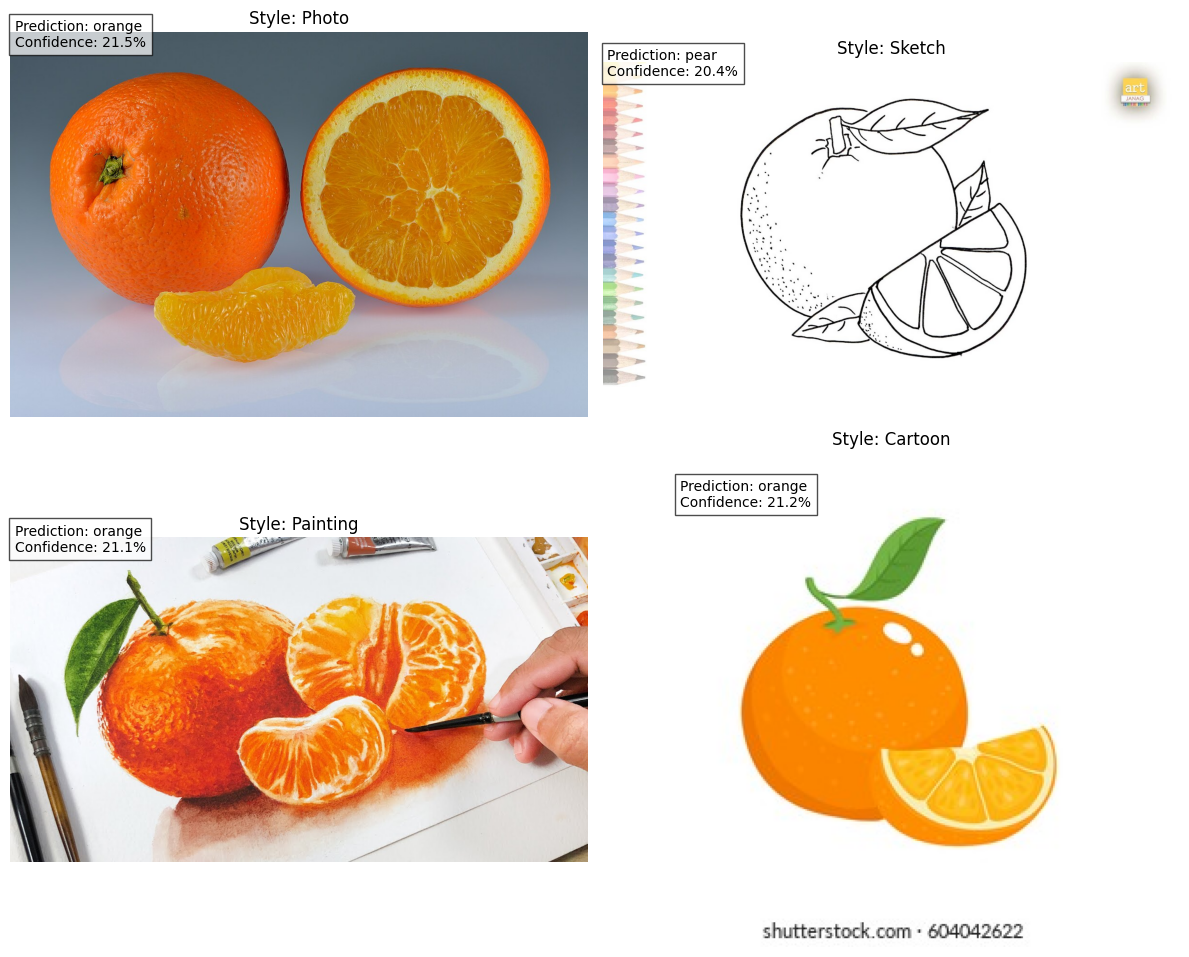

In [51]:
# Define image URLs for different styles of the same object
image_urls = {
    "Photo": "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Oranges_-_whole-halved-segment.jpg/1200px-Oranges_-_whole-halved-segment.jpg",
    "Sketch": "https://i.ytimg.com/vi/5eOh2gFcXcQ/maxresdefault.jpg",
    "Painting": "https://i.ytimg.com/vi/GJ0NlhSyG8A/maxresdefault.jpg",
    "Cartoon": "https://www.shutterstock.com/image-vector/bright-vector-set-colorful-slice-260nw-604042622.jpg"
}

fruit_classes = ["orange", "apple", "banana", "strawberry", "pear"]
prompt_template = "a photo of a {}, a type of fruit."

text_inputs = torch.cat([clip.tokenize(prompt_template.format(c)) for c in fruit_classes]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_inputs)
    text_features /= text_features.norm(dim=-1, keepdim=True)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

results = {}
for i, (style, url) in enumerate(image_urls.items()):
    # Load and display image
    image = Image.open(requests.get(url, stream=True).raw)
    axes[i].imshow(image)
    axes[i].set_title(f"Style: {style}")
    axes[i].axis('off')

    

    image_input = preprocess(image).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        
        # Calculate similarity
        similarity = 100.0 * (image_features @ text_features.T).softmax(dim=-1)
        results[style] = similarity[0].cpu().numpy()
        
        prediction = fruit_classes[similarity[0].argmax().item()]
        confidence = similarity[0].max().item() 
        axes[i].text(10, 30, f"Prediction: {prediction}\nConfidence: {confidence:.1f}%", 
                    bbox=dict(facecolor='white', alpha=0.7))
# Print confidence scores for all fruit classes
for style, scores in results.items():
    print(f"\nConfidence scores for style: {style}")
    for fruit, score in zip(fruit_classes, scores):
        print(f"  {fruit:<10}: {score:.2f}%")

plt.tight_layout()
plt.show()



#### conclusion:
CLIP is able to work on images from different distribtuions ( like sketches/ photo/painting etc). For sketches we see it wrongly predicts pear instead

### calculating distance between text embedding and image embedding

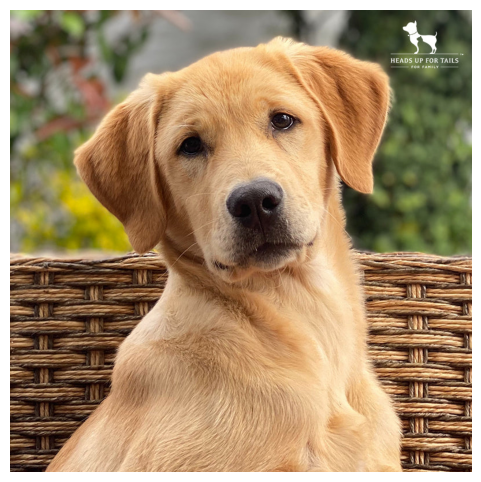

a photo of a dog: 99.85%
a photo of a cat: 0.15%
a photo of a house: 0.01%
a photo of a car: 0.00%


In [37]:


# Load an image
url = "https://cdn.shopify.com/s/files/1/0086/0795/7054/files/Golden-Retriever.jpg?v=1645179525"
response = requests.get(url)
image = Image.open(BytesIO(response.content))
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.show()
image_input = preprocess(image).unsqueeze(0).to(device)

# Define classes to classify against
classes = ["a photo of a cat", "a photo of a dog", "a photo of a car", "a photo of a house"]
text_inputs = torch.cat([clip.tokenize(c) for c in classes]).to(device)

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Normalize features
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

# Calculate similarity
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(len(classes))

# Print results
for value, index in zip(values, indices):
    print(f"{classes[index]:>16s}: {100 * value.item():.2f}%")


### using CLIP to retrieve image from database guven a text prompt

100%|██████████| 7/7 [00:00<00:00, 64.81it/s]


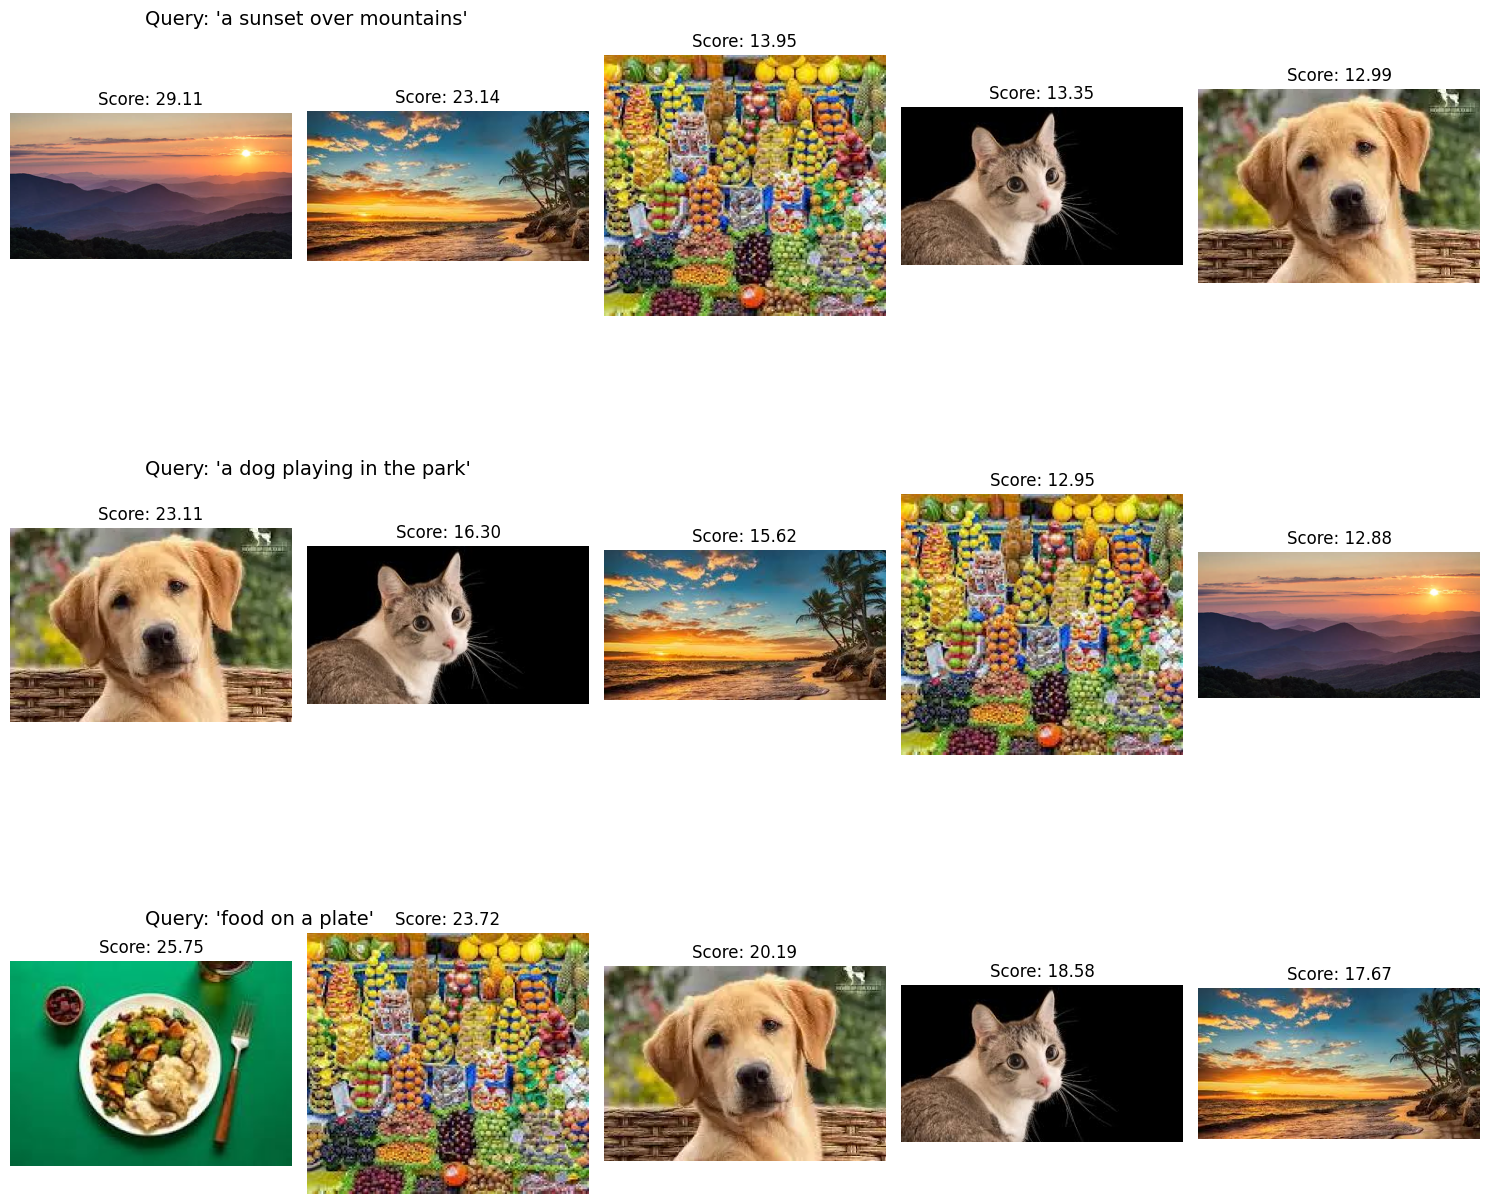

In [39]:
import os
from tqdm import tqdm
# Function to encode images from a folder
def encode_image_folder(folder_path):
    encoded_images = []
    image_paths = []
    
    for filename in tqdm(os.listdir(folder_path)):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                image_path = os.path.join(folder_path, filename)
                image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
                
                with torch.no_grad():
                    image_features = model.encode_image(image)
                    image_features /= image_features.norm(dim=-1, keepdim=True)
                
                encoded_images.append(image_features.cpu().numpy())
                image_paths.append(image_path)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    
    return np.vstack(encoded_images), image_paths

# Search images by text query
def search_images(text_query, encoded_images, image_paths, top_k=5):
    with torch.no_grad():
        text_input = clip.tokenize([text_query]).to(device)
        text_features = model.encode_text(text_input)
        text_features /= text_features.norm(dim=-1, keepdim=True)
    
    # Calculate similarities
    similarities = (100.0 * torch.from_numpy(encoded_images) @ text_features.T.cpu()).numpy()
    
    # Get top matches
    best_image_idx = np.argsort(similarities.flatten())[::-1][:top_k]
    
    return [(image_paths[idx], similarities[idx][0]) for idx in best_image_idx]

# Demo the image search
encoded_images, image_paths = encode_image_folder("/kaggle/input/image-folder/folder_with_images")

queries = ["a sunset over mountains", "a dog playing in the park", "food on a plate"]

plt.figure(figsize=(15, 5 * len(queries)))

for i, query in enumerate(queries):
    results = search_images(query, encoded_images, image_paths)
    
    for j, (image_path, score) in enumerate(results):
        plt.subplot(len(queries), 5, i * 5 + j + 1)
        plt.imshow(Image.open(image_path))
        plt.axis('off')
        plt.title(f"Score: {score:.2f}")
    
    plt.figtext(0.1, 0.9 - i * 0.3, f"Query: '{query}'", fontsize=14)

plt.tight_layout()
plt.savefig("image_search_results.png")
plt.show()



### VQA TASK 

https://github.com/ArushiKumar11/DA312_VQA_Methods/tree/main/medical_vqa

an implemented project of mine (earlier course project) 
that finetunes a CLIP Model trained on Medical data ( PubMedCLIP) on image scan dataset 


## Reflections

### What Surprised Me

1. **Efficiency of Contrastive Learning**: The paper's demonstration that contrastive learning is 4x more efficient than bag-of-words prediction and 12x more efficient than transformer language modeling was eye-opening. This efficiency gap explains why previous approaches with similar ideas but different training objectives couldn't scale effectively.

2. **Robustness to Distribution Shift**: One of the most surprising findings was that zero-shot CLIP models significantly outperform supervised models in terms of robustness to distribution shifts as per the paper. This suggests that the typical approach of optimizing for a specific dataset might inherently lead to models that overfit to dataset-specific patterns rather than learning generalizable visual concepts.


3. **Prompt Engineering's Impact**: The significant performance improvements achieved through simple prompt engineering techniques (up to 5% on ImageNet) demonstrate how crucial the interface between the model and the task specification is.
As the paper quotes - "Another issue we encountered is that it’s relatively rare in
 our pre-training dataset for the text paired with the image
 to be just a single word. Usually the text is a full sentence
 describing the image in some way. To help bridge this
 distribution gap, we found that using the prompt template
 “A photo of a label.” tobeagooddefault that
 helps specify the text is about the content of the image. This
 often improves performance over the baseline of using only
 the label text."

5. **Dataset Influence Over Architecture**: The paper suggests that the dataset's scale and quality had a much larger impact on performance than architectural choices. This challenges the common research focus on architecture design and suggests allocating more resources to data curation and scaling.

### Scope for Improvement

1. **Computational Efficiency**: Despite being more efficient than alternatives, CLIP still requires enormous computational resources. The paper estimates that a 1000x increase in compute would be needed for zero-shot CLIP to match state-of-the-art supervised models on all tasks. Developing more compute-efficient training methods would make this approach more accessible.

2. **Few-Shot Performance**: While CLIP excels at zero-shot tasks, the transition to few-shot learning is somewhat counterintuitive. Adding just a few examples sometimes decreases performance relative to zero-shot predictions. Developing methods that better integrate prior knowledge (from zero-shot) with example-based learning could yield significant improvements.

3. **Handling Abstract and Systematic Tasks**: CLIP struggles with abstract and systematic tasks like counting objects in an image. This suggests limitations in how well natural language supervision captures certain visual reasoning capabilities. Combining CLIP's approach with methods specifically designed for reasoning tasks might address this gap.

4. **Data Diversity and Bias**: The web-scale training data inevitably contains biases present in internet text and images. While the paper acknowledges these issues, there's significant room for improvement in developing methods to identify and mitigate these biases during training or inference.

5. **Integration with Video Understanding**: While CLIP shows strong performance on action recognition from single frames, extending its capabilities to understand temporal dynamics in videos would be a valuable improvement. This might involve adapting the contrastive learning objective to include temporal information.


6. **Explainability**: Like many deep learning models, CLIP's decision-making process lacks transparency. Developing methods to explain CLIP's predictions would increase trust and enable more effective human-AI collaboration. Recent work on feature visualization and attribution methods for multimodal models represents a promising direction for making CLIP's decisions more interpretable.



## References

### Primary Paper
- Radford, A., Kim, J. W., Hallacy, C., Ramesh, A., Goh, G., Agarwal, S., Sastry, G., Askell, A., Mishkin, P., Clark, J., Krueger, G., & Sutskever, I. (2021). Learning Transferable Visual Models From Natural Language Supervision. *arXiv preprint arXiv:2103.00020*.

### Resources Used for This Analysis
- OpenAI's CLIP GitHub Repository: https://github.com/openai/CLIP
- CLIP Paper Implementation in PyTorch: https://github.com/openai/CLIP/tree/main/clip
- Hugging Face's CLIP Documentation: https://huggingface.co/docs/transformers/model_doc/clip
- Berkeley AI Research Blog (for reference on blog style): https://bair.berkeley.edu/blog/
- Other Blogs and Youtube Videos on CLIP Model for better understanding
- Github Repos of Custom CLIP Model codes and codes on experiments on CLIP Model
-  ChatGPT for grammar correction, language refinement, and writing assistance (helping to improve clarity and structure of my own analysis)

